In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df =pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


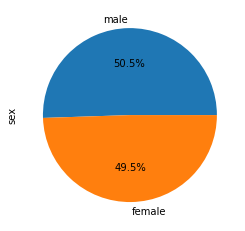

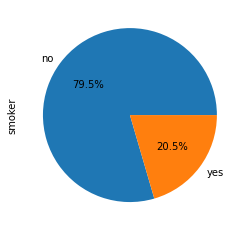

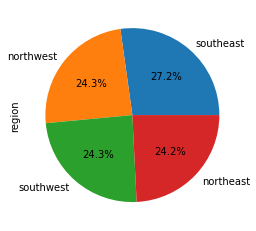

In [19]:
# plot all categorical data for fruther analysis
df['sex'].value_counts().plot.pie(autopct='%1.1f%%')     # plotting the sex categories
plt.show()
df['smoker'].value_counts().plot.pie(autopct='%1.1f%%')  # plotting the smokers categories
plt.show()
df['region'].value_counts().plot.pie(autopct='%1.1f%%')  # plotting the region categories  
plt.show()

/Users/amrzair/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amrzair/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amrzair/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

<AxesSubplot:xlabel='expenses', ylabel='Density'>

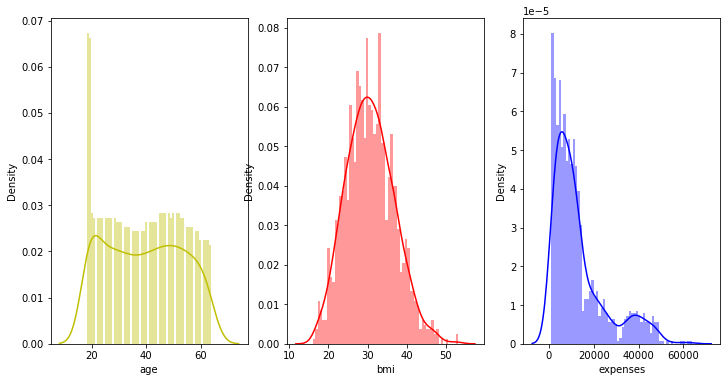

In [37]:
# plotting all numerical columns to explore the data.
fig, axs = plt.subplots(figsize = (12,6),nrows = 1, ncols =3)
sns.distplot(df['age'], bins = 60, ax = axs[0], color = 'y')
sns.distplot(df['bmi'], bins = 60, ax = axs[1], color = 'r')
sns.distplot(df['expenses'], bins = 60, ax = axs[2], color ='b')

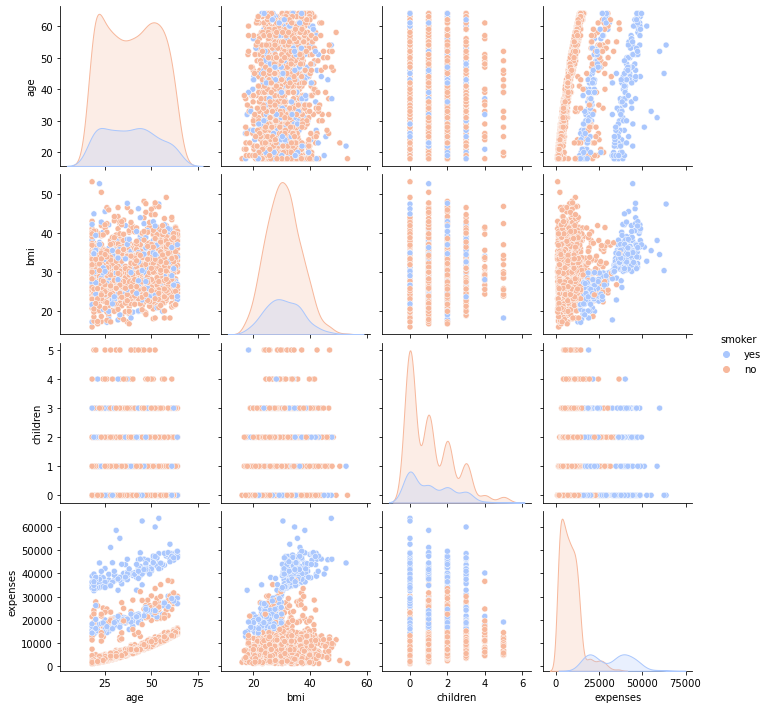

In [26]:
# inspecting the data relations to smoker
sns.pairplot(df, hue ='smoker', palette = 'coolwarm')

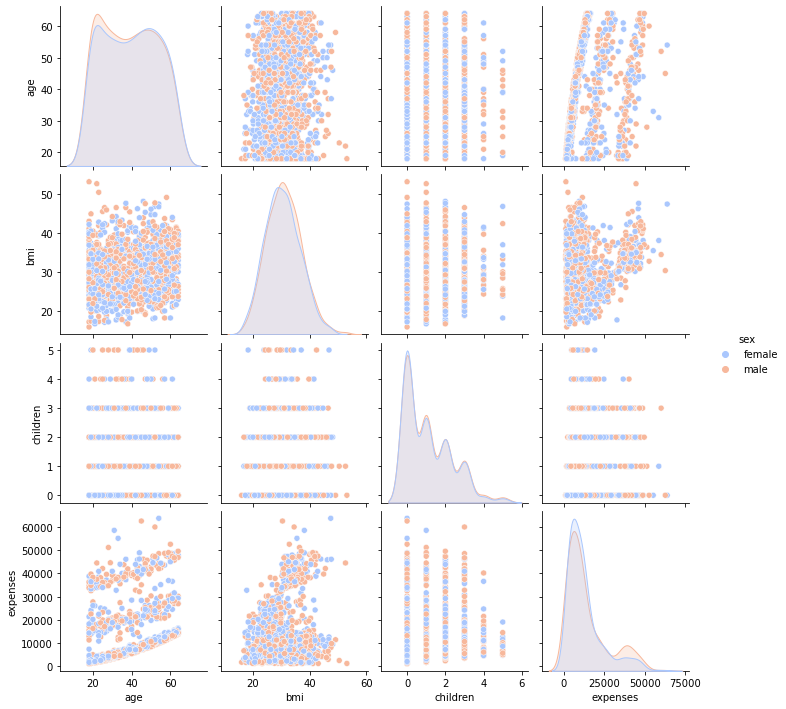

In [38]:
# inspecting the data relations with sex
sns.pairplot(df, hue = 'sex', palette = 'coolwarm')

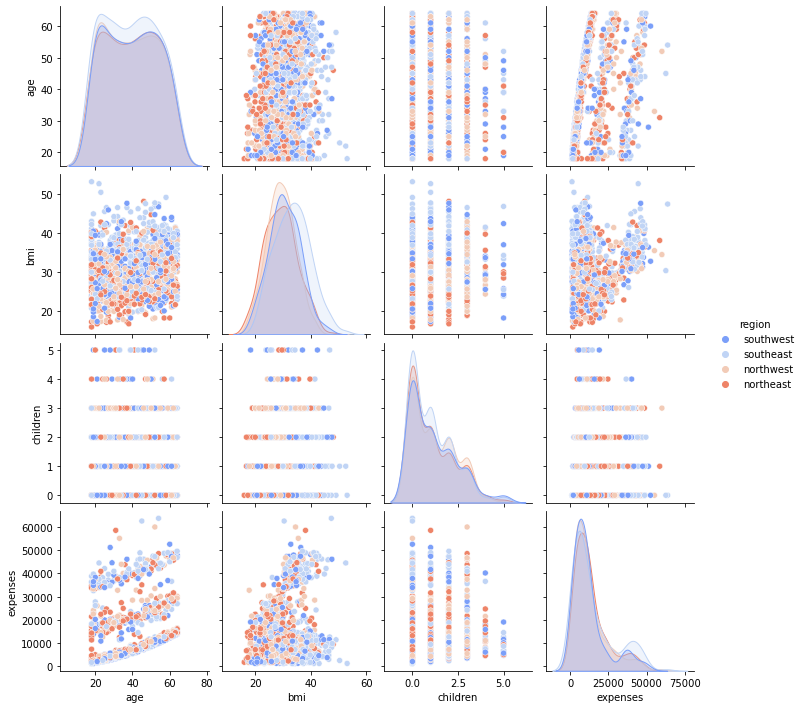

In [39]:
# inspecting the data relations with region
sns.pairplot(df, hue = 'region', palette = 'coolwarm')

In [48]:
# Detecting for outliers existence and determine their values if any

# Using the following script to search for outliers
# Creating a function that determine all outliers for a dataframe series
def df_outlier(dataframe):
    stat = dataframe.describe()         # creating a variable that include the statistical data using describe function
    q1 = stat[4]                   # putting the first quartile in a variable
    q3 = stat[6]                   # putting the third quartile in a variable
    iqr = q3-q1
    upper_limit = q3 + 1.5 * iqr   # determining the upper limit normal data
    lower_limit = q1 - 1.5 * iqr   # determining the lower limit normal data
    upper_outlier = []             # creating a blank list to include the upper outliers
    lower_outlier = []             # creating a blank list to include the lower outliers
    for i in dataframe:                 # looping on the specified series to pick the outliers
        if i >upper_limit:
            upper_outlier.append(i)
        elif i <lower_limit:
            lower_outlier.append(i) 
    print('There are ',len(upper_outlier + lower_outlier),'Outlieres, Which are included in the following list',upper_outlier + lower_outlier) 

There are  0 Outlieres, Which are included in the following list []


/Users/amrzair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

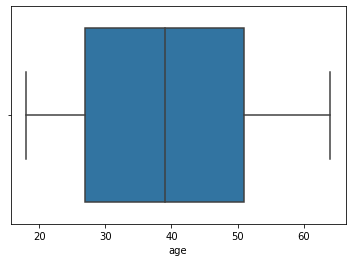

In [49]:
# for age:
df_outlier(df['age'])
sns.boxplot(df['age'])

There are  9 Outlieres, Which are included in the following list [49.1, 48.1, 47.5, 47.4, 50.4, 47.6, 52.6, 47.7, 53.1]


/Users/amrzair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

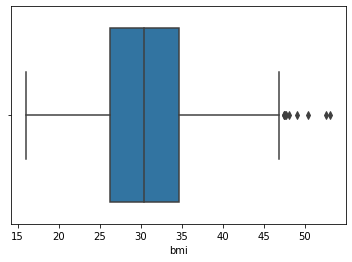

In [50]:
# for bmi:
df_outlier(df['bmi'])
sns.boxplot(df['bmi'])

There are  139 Outlieres, Which are included in the following list [39611.76, 36837.47, 37701.88, 38711.0, 35585.58, 51194.56, 39774.28, 48173.36, 38709.18, 37742.58, 47496.49, 37165.16, 39836.52, 43578.94, 47291.06, 47055.53, 39556.49, 40720.55, 36950.26, 36149.48, 48824.45, 43753.34, 37133.9, 34779.62, 38511.63, 35160.13, 47305.31, 44260.75, 41097.16, 43921.18, 36219.41, 46151.12, 42856.84, 48549.18, 47896.79, 42112.24, 38746.36, 42124.52, 34838.87, 35491.64, 42760.5, 47928.03, 48517.56, 41919.1, 36085.22, 38126.25, 42303.69, 46889.26, 46599.11, 39125.33, 37079.37, 35147.53, 48885.14, 36197.7, 38245.59, 48675.52, 63770.43, 45863.21, 39983.43, 45702.02, 58571.07, 43943.88, 39241.44, 42969.85, 40182.25, 34617.84, 42983.46, 42560.43, 40003.33, 45710.21, 46200.99, 46130.53, 40103.89, 34806.47, 40273.65, 44400.41, 40932.43, 40419.02, 36189.1, 44585.46, 43254.42, 36307.8, 38792.69, 55135.4, 43813.87, 39597.41, 36021.01, 45008.96, 37270.15, 42111.66, 40974.16, 46113.51, 46255.11, 44202.65, 

/Users/amrzair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='expenses'>

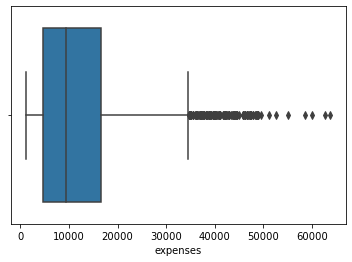

In [52]:
# for expenses:
df_outlier(df['expenses'])
sns.boxplot(df['expenses'])